# (BayWheels Dataset Exploration)
## by (Benny Van Hoof)

## 1) Preliminary Wrangling

> This document explores a dataset containing information (duration, location, time, user type) about 1.8 m bike rentals in San Francisco in 2018.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sb
import glob
from math import radians, cos, sin, asin, sqrt




### 1a) Load the dataset

In [2]:
## a number of csv files are loaded (one file for each month)
appended_data = []

for filename in glob.iglob('*.csv', recursive=False):
    data = pd.read_csv(filename)
    appended_data.append(data)
biketrips = pd.concat(appended_data, sort=False)
#biketrips = biketrips.reset_index()
    
    
    

### 1b)  Some basic tests on the dataset

In [3]:
biketrips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


In [4]:
#Number of rows and columns
biketrips.shape



(1863721, 14)

In [5]:
## Variable type for each columns
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131168
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 213.3+ MB


In [6]:
# descriptive statistics for numeric variables
print(biketrips.describe())

       duration_sec  start_station_id  start_station_latitude  \
count  1.863721e+06      1.851950e+06            1.863721e+06   
mean   8.573026e+02      1.196744e+02            3.776678e+01   
std    2.370379e+03      1.003976e+02            1.057689e-01   
min    6.100000e+01      3.000000e+00            3.726331e+01   
25%    3.500000e+02      3.300000e+01            3.777106e+01   
50%    5.560000e+02      8.900000e+01            3.778107e+01   
75%    8.720000e+02      1.860000e+02            3.779625e+01   
max    8.636600e+04      3.810000e+02            4.551000e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             1.863721e+06    1.851950e+06          1.863721e+06   
mean             -1.223492e+02    1.181730e+02          3.776690e+01   
std               1.654634e-01    1.004403e+02          1.056483e-01   
min              -1.224737e+02    3.000000e+00          3.726331e+01   
25%              -1.224114e+02    3.000000e+01        

In [7]:
## number of null values per column 
biketrips.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

Some empty cells in the station id and name  (start and end station)

In [8]:
biketrips['user_type'].value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [9]:
biketrips['bike_id'].value_counts() 

3961    1220
4452    1141
3729    1062
3379    1057
3254    1055
        ... 
3763       1
3758       1
4612       1
888        1
4085       1
Name: bike_id, Length: 5054, dtype: int64

In [10]:
biketrips['start_station_name'].value_counts() 

San Francisco Ferry Building (Harry Bridges Plaza)           38461
San Francisco Caltrain Station 2  (Townsend St at 4th St)    37617
San Francisco Caltrain (Townsend St at 4th St)               35092
Market St at 10th St                                         34918
Berry St at 4th St                                           33716
                                                             ...  
William St at 4th St (Temporary Location)                       26
Viva Calle SJ                                                   25
Williams Ave at 3rd St                                          17
Farnam St at Fruitvale Ave                                      14
2nd St at S Park St                                             11
Name: start_station_name, Length: 348, dtype: int64

In [11]:
biketrips['end_station_name'].value_counts() 

San Francisco Caltrain Station 2  (Townsend St at 4th St)    50000
San Francisco Ferry Building (Harry Bridges Plaza)           44113
San Francisco Caltrain (Townsend St at 4th St)               42970
The Embarcadero at Sansome St                                39222
Montgomery St BART Station (Market St at 2nd St)             35955
                                                             ...  
2nd St at S Park St                                             33
Lane St at Van Dyke Ave                                         33
Williams Ave at 3rd St                                          24
Viva Calle SJ                                                   15
Farnam St at Fruitvale Ave                                      12
Name: end_station_name, Length: 348, dtype: int64

In [12]:
biketrips['end_station_longitude'].value_counts() 

-122.395526    50000
-122.394203    44113
-122.395282    42970
-122.403234    39222
-122.400811    35955
               ...  
-74.010000         3
-121.830000        2
-93.220000         2
-122.000000        1
-121.990000        1
Name: end_station_longitude, Length: 371, dtype: int64

Some outliers here

In [13]:
biketrips['start_station_longitude'].value_counts() 

-122.394203    38461
-122.395526    37617
-122.395282    35092
-122.417385    34918
-122.393170    33716
               ...  
-121.840000        3
-74.010000         3
-93.220000         2
-121.830000        1
-121.990000        1
Name: start_station_longitude, Length: 370, dtype: int64

some outliers here

In [14]:
biketrips['start_station_latitude'].value_counts() 

37.795392    38461
37.776639    37617
37.776598    35092
37.776619    34918
37.775880    33716
             ...  
37.440000        3
45.500000        2
44.950000        2
37.320000        2
37.450000        1
Name: start_station_latitude, Length: 369, dtype: int64

some outliers here

In [15]:
biketrips['end_station_latitude'].value_counts() 

37.776639    50000
37.795392    44113
37.776598    42970
37.804770    39222
37.789625    35955
             ...  
37.490000        3
40.660000        3
44.950000        2
37.280000        1
37.450000        1
Name: end_station_latitude, Length: 370, dtype: int64

In [16]:
biketrips['bike_share_for_all_trip'].value_counts() 

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

Some outliers here

biketrips['bike_share_for_all_trip'].value_counts()

### 1c) Data Wrangling based on the observations

#### - Null values for stations id and name


A very limited number of rows (< 1%) doesn't have the id and name for the start station and end station. In the next session , I will have a closer look at these lines to decide what to do with them.

In [17]:
## Creation of a temporary dataframe with only rows without
##start_station (id and name) and end_station (id and name)
df_nostation = biketrips[biketrips['start_station_id'].isnull() & biketrips['end_station_id'].isnull()]

In [18]:
df_nostation.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.42,-121.94,NaN,NaN,37.41,-121.94,4105,Customer,No
258,392,2018-11-30 21:05:43.9400,2018-11-30 21:12:16.1520,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.94,4181,Subscriber,No
419,366,2018-11-30 20:07:04.5700,2018-11-30 20:13:10.5990,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4181,Subscriber,No
546,351,2018-11-30 19:27:46.8680,2018-11-30 19:33:38.4550,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4157,Subscriber,No
875,309,2018-11-30 18:37:23.5710,2018-11-30 18:42:33.2340,NaN,NaN,37.38,-121.94,NaN,NaN,37.38,-121.93,4147,Subscriber,Yes


In [19]:
df_nostation.shape[0]

11771

In [20]:
## overview of the different start_stations latitudes in the dataframe without start_stations
df_nostation['start_station_latitude'].value_counts()

37.41    4809
37.40    4395
37.42    1204
37.39     822
37.38     405
37.34      37
37.43      23
37.37      17
37.35      17
37.33      17
37.36       8
45.51       4
40.66       3
37.44       3
37.32       2
44.95       2
45.50       2
37.45       1
Name: start_station_latitude, dtype: int64

I will pickout the two values with the most number of rows to find out whether they have a value for station_id i the base dataframe biketrips

In [21]:
## to find other lines with the same start station latitude in the base dataframe biketrips
df3741 = biketrips[(biketrips['start_station_latitude'] == 37.41) ]
df3741['start_station_id'].value_counts()

Series([], Name: start_station_id, dtype: int64)

In [22]:
## to find other lines with the same start station latitude in the base dataframe biketrips
df3740 = biketrips[(biketrips['start_station_latitude'] == 37.40) ]
df3740['start_station_id'].value_counts()

Series([], Name: start_station_id, dtype: int64)

None of the rows with start station latitude 37.40 or 37.41 has a value for start station_id in the original dataframe

There doesn't seem to be a way to fill in the missing values in de columns start_station_id and start_station_name.
As the number of rows represents only a very small part (0.6%) of the total rows. I Will delete them from the dataframe.

In [23]:
## delete the lines with a null value in start station id and name
biketrips = biketrips[biketrips['start_station_id'].notnull() & biketrips['end_station_id'].notnull()]

In [24]:
## number of rows and columns in the new dataframe
biketrips.shape

(1851950, 14)

#### - Creation of  four extra columns : month ,weekday, hour and weeknumber

Because the bike rental frequency, length of the trips, will be analysed per month, per weekday, per hour and weeknumber, it is better to have this information in a separate column

In [25]:
biketrips['start_time'] = pd.to_datetime(biketrips['start_time'])
biketrips['end_time'] = pd.to_datetime(biketrips['end_time'])

In [26]:
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 131168
Data columns (total 14 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 211.9+ MB


In [27]:
## Creation of an extra column weekday
biketrips['weekday'] = biketrips['start_time'].dt.dayofweek

In [28]:
## overview of the different possible values (Monday = 0, Sunday = 6)
biketrips['weekday'].value_counts()

1    317540
2    314495
3    312258
0    292878
4    288746
5    174140
6    151893
Name: weekday, dtype: int64

In [29]:
## Creation of an extra column month
biketrips['month'] = biketrips['start_time'].dt.month

In [30]:
## overview of the different possible values
biketrips['month'].value_counts()

10    200102
7     196038
6     193907
8     189250
9     184635
5     179125
11    133651
12    131171
4     131169
3     111382
2     106718
1      94802
Name: month, dtype: int64

In [31]:
## add column months and fill with 3 char based on mont column

In [32]:
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
biketrips['months'] = biketrips['month'].apply(lambda month: month_names[month-1])


In [33]:
## overview of the different possible values
biketrips['months'].value_counts()

Oct    200102
Jul    196038
Jun    193907
Aug    189250
Sep    184635
May    179125
Nov    133651
Dec    131171
Apr    131169
Mar    111382
Feb    106718
Jan     94802
Name: months, dtype: int64

In [34]:
## Creation of an extra column weeknr
biketrips['weeknr'] = biketrips['start_time'].dt.week

In [35]:
## Overview of the different values for weeknr
biketrips['weeknr'].value_counts()

28    47373
29    46887
37    46030
39    46028
25    45995
26    45824
30    45790
40    45513
38    45311
42    44907
24    44804
41    44317
23    44248
32    44154
44    43989
43    43619
31    42308
34    41786
33    41373
19    41334
20    40682
35    40560
22    40512
36    40503
45    40281
21    39657
18    39199
27    38737
17    36345
51    36065
50    35449
49    33496
48    30534
13    30360
16    29825
6     29734
15    29682
46    29649
7     28065
5     27955
10    27889
14    26999
12    24413
4     23774
8     22543
11    21871
3     21647
9     21122
2     19548
1     19191
52    18000
47    16073
Name: weeknr, dtype: int64

In [36]:
## Creation of an extra column hour
biketrips['hour'] = biketrips['start_time'].dt.hour

In [37]:
## Overview of the different values for hour
biketrips['hour'].value_counts()

17    218862
8     206081
18    170124
9     160066
16    142347
19    102765
7     101475
15     96219
12     89340
13     87062
10     83603
14     82670
11     78976
20     65825
21     46466
6      36256
22     30792
23     18510
0      10158
5      10010
1       5841
2       3679
4       2718
3       2105
Name: hour, dtype: int64

In [38]:
biketrips.shape

(1851950, 19)

In [39]:
biketrips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,weekday,month,months,weeknr,hour
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,2,2,Feb,9,23
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,2,2,Feb,9,23
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,2,2,Feb,9,18
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,2,2,Feb,9,18
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,2,2,Feb,9,23


In [40]:
biketrips.shape

(1851950, 19)

In [41]:
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 131168
Data columns (total 19 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
weekday                    int64
month                      int64
months                     object
weeknr                     int64
hour                       int64
dtypes: datetime64[ns](2), float64(6), int64(6), object(5)
memory usage: 282.6+ MB


#### - Calculation of the distance of the trips in an extra column

In [42]:
## This function is used to calculate the values of the column distance
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r




In [43]:
## a column distance is added with the distance from start_point_station to end_point_station
biketrips['distance'] = biketrips[['start_station_longitude','start_station_latitude','end_station_longitude','end_station_latitude']].apply(lambda x:haversine(x[0],x[1],x[2],x[3]), axis = 1)

In [44]:
biketrips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,weekday,month,months,weeknr,hour,distance
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,2,2,Feb,9,23,2.272570
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,2,2,Feb,9,23,1.889592
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,2,2,Feb,9,18,2.790681
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,2,2,Feb,9,18,2.790681
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,2,2,Feb,9,23,1.630598


In [45]:
biketrips['distance'].describe()

count    1.851950e+06
mean     1.594331e+00
std      1.026884e+00
min      0.000000e+00
25%      8.705716e-01
50%      1.374943e+00
75%      2.088456e+00
max      6.530925e+01
Name: distance, dtype: float64

In [46]:
biketrips['distance'].value_counts()

0.000000    52041
1.310345    11380
1.413548     8026
2.171534     7761
1.035589     7710
            ...  
5.264529        1
0.645716        1
3.881753        1
1.748116        1
4.248642        1
Name: distance, Length: 18998, dtype: int64

In [47]:
## I want to look at the lines with distance zero
biketrips[biketrips['distance']==0].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,weekday,month,months,weeknr,hour,distance
27,994,2018-02-28 22:17:06.664,2018-02-28 22:33:41.122,235.0,Union St at 10th St,37.807239,-122.289370,235.0,Union St at 10th St,37.807239,-122.289370,1277,Subscriber,No,2,2,Feb,9,22,0.0
45,910,2018-02-28 21:54:18.773,2018-02-28 22:09:29.363,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,1097,Subscriber,No,2,2,Feb,9,21,0.0
69,1041,2018-02-28 21:34:45.200,2018-02-28 21:52:06.534,296.0,5th St at Virginia St,37.325998,-121.877120,296.0,5th St at Virginia St,37.325998,-121.877120,1091,Subscriber,Yes,2,2,Feb,9,21,0.0
109,2062,2018-02-28 20:51:08.139,2018-02-28 21:25:31.067,296.0,5th St at Virginia St,37.325998,-121.877120,296.0,5th St at Virginia St,37.325998,-121.877120,47,Subscriber,Yes,2,2,Feb,9,20,0.0
957,67,2018-02-28 18:01:40.866,2018-02-28 18:02:48.556,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,3513,Subscriber,No,2,2,Feb,9,18,0.0


In [48]:
## count the rows with zero distance
biketrips[biketrips['distance'] == 0].shape[0]

52041

In [49]:
## count the rows with zero distance and start_station equal to end station
biketrips[(biketrips['distance'] == 0) & (biketrips['start_station_latitude']
                                          == biketrips['end_station_latitude'])].shape[0]

52041

The start and end station latitudes and longitudes are indeed the same  for all these lines Most likely, these rentals might be done by tourists who make a roundtrip or by people who forgot something or changed their mind and returned to the starting point very short after they started the trip.


In [50]:
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 131168
Data columns (total 20 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
weekday                    int64
month                      int64
months                     object
weeknr                     int64
hour                       int64
distance                   float64
dtypes: datetime64[ns](2), float64(7), int64(6), object(5)
memory usage: 296.7+ MB


In [51]:
biketrips.shape

(1851950, 20)

### Conclusion
> There are 1.851.950 bike rentals in the data set with 18 features (duration, start_time, end_time, start_station_id, start_station_name,start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latidude, end_station_longitude,bike_id, user_type, weekday, month,months, weeknr, hour, distance). Most variables are numeric in nature (float and int). The start and end time are of the datetime format.


> I am interested in figuring out which features are drivers for a bike rental like the hour of the day, day of the week, the month of the year, type of customer. Can we make the same conclusions if we combine two or three of these features ?



## 2) Univariate Exploration

> In this section, I will investigate the distribution of :
 - Duration of the trips
 - Biketrips per month
 - Biketrips per hour
 - Biketrips per weekday
 - User type
 - Bike share
 - Distance



#### 2a ) Univariate Exploration - Duration of the trips

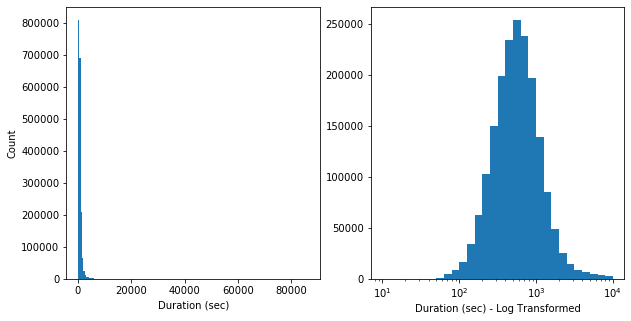

In [52]:
fig_duration = plt.figure(figsize = [10,5])

## first histogram withlout any adjustments
ax_dur_1 = plt.subplot(1, 2, 1)
binsize = 500
bins = np.arange(0, biketrips['duration_sec'].max()+binsize, binsize)


plt.hist(data = biketrips, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')

## plot of the transformed log data
ax_dur_2 = plt.subplot(1, 2, 2)
bins = 10 **np.arange(1,4+0.1,0.1)
plt.hist(data = biketrips, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlabel('Duration (sec) - Log Transformed')


plt.show()

There seems to be an extremely long tail. As we can also see in the base test above, the vast majority of the bike trips doesn't take longer than 15 min (872 sec)

I  wil concentrate on the durations of max 30 min (1800 sec). These rows represent about 95 % of the rows of the dataset

In [53]:
## number of rows with duration < 30 min
dftemp = biketrips[biketrips['duration_sec' ] <=1800]
numerator = dftemp.shape[0]

In [54]:

denominator = biketrips.shape[0]
percent = numerator/denominator

In [55]:
## percentage of the trips of max 30 min
print(percent)

0.9497097653824347


Text(0.5, 1.0, 'Duration Biketrips (sec)')

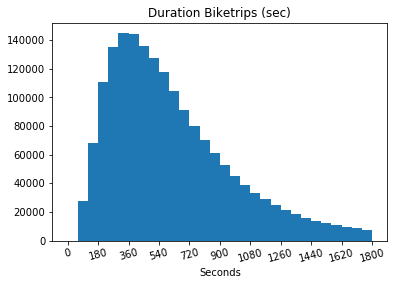

In [56]:
binsize = 60
# establish tick locations and create plot

tick_props = np.arange(0,1800+ binsize, 180)
tick_names = ['{:0.0f}'.format(v) for v in tick_props]
bins = np.arange(0,1800 + binsize,binsize )
plt.hist(biketrips['duration_sec'], bins = bins)
plt.xticks(tick_props , tick_names)
plt.xticks (rotation = 15)
plt.xlabel('Seconds')
plt.title('Duration Biketrips (sec)')

The distribution of the duration of the biketrips is almost like a normal distribution on the right hand side of the maximum number of trips. On the left hand side it is very steep. the . The maximum number of biketrips seems to take between 300 seconds and 400 seconds. A very limited number takes a bike for a trip les than 3 min. In that case they probably prefer to walk. Above a duration of 300-400 seconds, the number of bike trips goes gradually down per minute.

#### 2b) Univariate Exploration -  Activity per weekday

In the next session , I will investigate the weekdays 

Text(0.5, 1.0, 'Biketrips per Weekday')

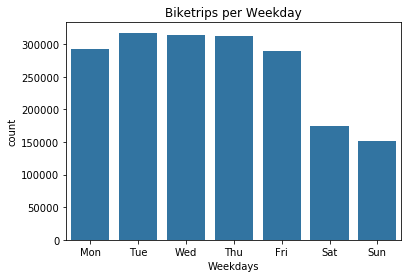

In [57]:
base_color = sb.color_palette()[0]
sb.countplot(data = biketrips, x = 'weekday', color = base_color)
plt.xlabel('Weekdays')

plt.xticks(np.arange(7), ('Mon', 'Tue','Wed','Thu','Fri','Sat','Sun'))

plt.title('Biketrips per Weekday')

>The midweek days (Tuesday - Thursday) are the most popular days for bike renters, followed by Monday and Friday. On weekends, the bike rentals are approximatively 50 to 60 percent of the bike rentals on working days. Sunday is the least popular day to rent a bike

#### 2c) Univariate Exploration -  Activity per Month 

Text(0.5, 1.0, 'Biketrips per Month')

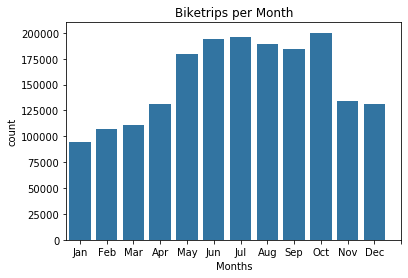

In [58]:
base_color = sb.color_palette()[0]
sb.countplot(data = biketrips, x = 'month', color = base_color)
plt.xlabel('Months')

plt.xticks(np.arange(13), ('Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'))

plt.title('Biketrips per Month')

>The top month for bike renting is , a little bit unexpected, October. October is followed at close range by the summer months (May till September). The least popular month for renting a bike is January. It has only (approximatively) 50% of the bike rentals of October. There is a steep rise in bike rentals from  April toMay and a steep drop from October to November.

To understand better why October is the top month , we will split out the bike rentals per week.

Text(0.5, 1.0, 'Biketrips per Week')

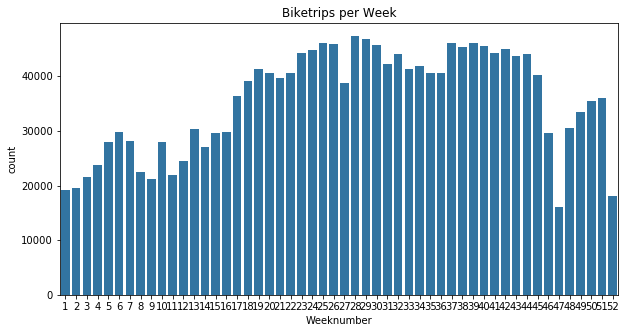

In [59]:
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]
#tick_props = np.arange(1,52,1)

tick_names = ['{:0.0f}'.format(v) for v in tick_props]
sb.countplot(data = biketrips, x = 'weeknr', color = base_color)
plt.xlabel('Weeknumber')
#plt.xticks(tick_props, tick_names)

plt.title('Biketrips per Week')

>I notice that week 47 is the week with the least rentals

In [60]:
biketrips47 = biketrips[(biketrips['weeknr']== 47) ]
biketrips47.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,weekday,month,months,weeknr,hour,distance
22577,85788,2018-11-25 14:31:42.769,2018-11-26 14:21:30.936,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,3158,Subscriber,Yes,6,11,Nov,47,14,1.986537
25117,50977,2018-11-25 17:19:30.015,2018-11-26 07:29:07.663,245.0,Downtown Berkeley BART,37.870139,-122.268422,250.0,North Berkeley BART Station,37.873558,-122.283093,1577,Customer,No,6,11,Nov,47,17,1.342703
25402,35644,2018-11-25 18:48:20.026,2018-11-26 04:42:24.190,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,27.0,Beale St at Harrison St,37.788059,-122.391865,4343,Customer,No,6,11,Nov,47,18,1.464766
25445,1893,2018-11-25 23:48:01.848,2018-11-26 00:19:35.480,370.0,Jones St at Post St,37.787327,-122.413278,114.0,Rhode Island St at 17th St,37.764478,-122.402570,4409,Subscriber,Yes,6,11,Nov,47,23,2.709346
25446,1617,2018-11-25 23:52:23.934,2018-11-26 00:19:21.220,52.0,McAllister St at Baker St,37.777416,-122.441838,138.0,Jersey St at Church St,37.750900,-122.427411,3065,Subscriber,No,6,11,Nov,47,23,3.209516


> It seems to be the week of Thanksgiving

In [61]:
##Select only the October weeks
biketrips_oct = biketrips[(biketrips['weeknr']>= 40) & (biketrips['weeknr']<= 44)]
biketrips_oct.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,weekday,month,months,weeknr,hour,distance
108218,74379,2018-11-04 17:22:41.083,2018-11-05 14:02:20.779,375.0,Grove St at Masonic Ave,37.774836,-122.446546,375.0,Grove St at Masonic Ave,37.774836,-122.446546,1106,Customer,No,6,11,Nov,44,17,0.000000
109328,63768,2018-11-04 16:07:48.001,2018-11-05 09:50:36.591,122.0,19th St at Mission St,37.760299,-122.418892,66.0,3rd St at Townsend St,37.778742,-122.392741,2648,Customer,No,6,11,Nov,44,16,3.080444
111762,16145,2018-11-04 21:35:49.914,2018-11-05 02:04:55.171,74.0,Laguna St at Hayes St,37.776435,-122.426244,345.0,Hubbell St at 16th St,37.766474,-122.398295,3924,Subscriber,No,6,11,Nov,44,21,2.694687
111770,19293,2018-11-04 19:59:40.742,2018-11-05 01:21:14.188,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,22.0,Howard St at Beale St,37.789756,-122.394643,2652,Customer,No,6,11,Nov,44,19,1.785766
111783,11123,2018-11-04 21:30:37.643,2018-11-05 00:36:01.350,203.0,Webster St at 2nd St,37.795195,-122.273970,237.0,Fruitvale BART Station,37.775232,-122.224498,3577,Customer,No,6,11,Nov,44,21,4.881390


I continue  looking at the month October, the month with the most rentals

Text(0.5, 1.0, 'Biketrips per Week (October)')

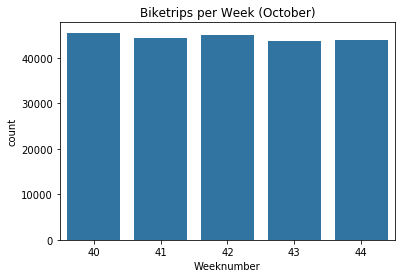

In [62]:

base_color = sb.color_palette()[0]
tick_names = ['{:0.0f}'.format(v) for v in tick_props]
sb.countplot(data = biketrips_oct, x = 'weeknr', color = base_color)
plt.xlabel('Weeknumber')
plt.title('Biketrips per Week (October)')

> In the top month October, there is not a week that jumps out. The bike rentals are more or less equal during the whole month.
I will have a look now at the distribution per hour.

#### d) Univariate Exploration -  Activity per  Hour

Text(0.5, 1.0, 'Biketrips per Week (October)')

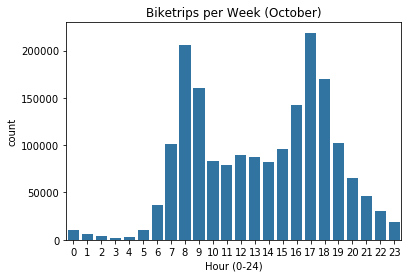

In [63]:

base_color = sb.color_palette()[0]
tick_names = ['{:0.0f}'.format(v) for v in tick_props]
sb.countplot(data = biketrips, x = 'hour', color = base_color)
plt.xlabel('Hour (0-24)')
plt.title('Biketrips per Week (October)') 

> There are clearly two peaks a day. One around 8 am and one around 5 pm. This seems to indicate that most people who rent a bike are people who need it to get to their work place. Unsurprisingly the lowest rental activity is around 3 am.

#### e) Univariate Exploration -  Bike Share 

In [64]:

biketrips['bike_share_for_all_trip'].value_counts() 

No     1690457
Yes     161493
Name: bike_share_for_all_trip, dtype: int64

Text(0.5, 1.0, 'Bike share for all trip')

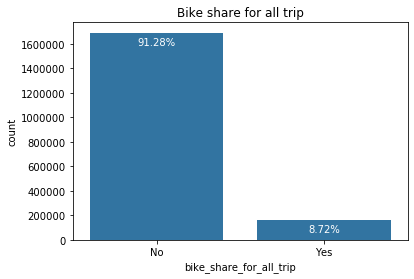

In [65]:
## bar chart showing split between yes and no for bike share
base_color = sb.color_palette()[0]
sb.countplot(data = biketrips, x = 'bike_share_for_all_trip', color = base_color)
cat_counts = biketrips['bike_share_for_all_trip'].value_counts()
total_counts = biketrips.shape[0]
locs, labels = plt.xticks()
## create annotation with the percentage
for loc, label in zip(locs, labels):
    counts = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*counts/total_counts)
    plt.text(loc, counts-100000, pct_string, ha = 'center', color = 'w')
plt.title('Bike share for all trip')
    
    



In [66]:
#### e) Univariate Exploration -   

The vast majority (85%) are Subscribers.

#### g) Univariate Exploration -  Distance

finally , I will have a look at the distance of the biketrips. With distance is meant here the distance between the start station and the end station. In a lot of, cases the user will not take the shortest way to the end station.

In [67]:
biketrips['distance'].describe()

count    1.851950e+06
mean     1.594331e+00
std      1.026884e+00
min      0.000000e+00
25%      8.705716e-01
50%      1.374943e+00
75%      2.088456e+00
max      6.530925e+01
Name: distance, dtype: float64

These are user who stopped the rental at the some location they started it.

Text(0.5, 1.0, 'Distance Biketrips in km ')

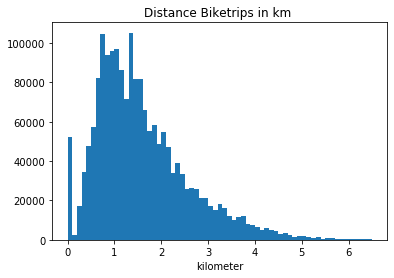

In [68]:
binsize = 0.1
# establish tick locations and create plot

#tick_props = np.arange(0,6.5+ binsize, binsize)
tick_names = ['{:0.0f}'.format(v) for v in tick_props]
bins = np.arange(0,6.5 + binsize,binsize )
plt.hist(biketrips['distance'], bins = bins)
#plt.xticks(tick_props , tick_names)

plt.xlabel('kilometer')
plt.title('Distance Biketrips in km ')

Distribution is binomial with a top around 0.5 km and a top around 1.5 km. Some trips take more than 6 km but the vast majority (75%) of the trips is less than 2 km. The high number for zero distance has been explained as users who start and end the rental at the same location.

In [69]:
## calculation of the trips with zero distance
zerodistance = biketrips[biketrips['distance']==0].shape[0]
print(zerodistance)
total  = biketrips.shape[0]
print(total)
zerodistancepercent = zerodistance/total
print(zerodistancepercent)

52041
1851950
0.028100650665514728


In the next section, I will have a look at the start and end stations

first I will plot a general overview of the latitudes

In [70]:
 biketrips['start_station_latitude'].value_counts()

37.795392    38461
37.776639    37617
37.776598    35092
37.776619    34918
37.775880    33716
             ...  
37.784855       20
37.729279       17
37.778058       14
37.782411       11
37.347721        6
Name: start_station_latitude, Length: 351, dtype: int64

In [71]:
biketrips['start_station_latitude'].describe()

count    1.851950e+06
mean     3.776904e+01
std      1.007719e-01
min      3.726331e+01
25%      3.777106e+01
50%      3.778107e+01
75%      3.779728e+01
max      3.788022e+01
Name: start_station_latitude, dtype: float64

In [72]:
##biketrips = biketrips[biketrips['start_station_latitude'] > 37.60]

Now, I will have a more detailed look at the distribution of the latitudes

Text(0.5, 1.0, 'Start Stations Latitude ')

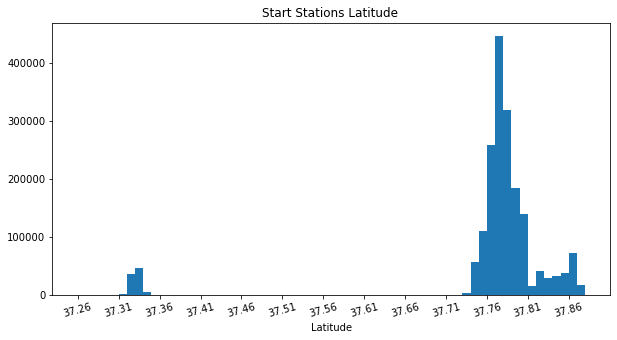

In [73]:
# First Graph : Start Stations
max_props = biketrips['start_station_latitude'].max()
min_props = biketrips['start_station_latitude'].min()

fig1a = plt.figure(figsize = (10,5))


binsize = 0.01
# establish tick locations and create plot


tick_props = np.arange(min_props,max_props + binsize, binsize*5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
bins = np.arange(min_props,max_props + binsize, binsize)
plt.hist(biketrips['start_station_latitude'], bins = bins)

plt.xticks(tick_props , tick_names)
plt.xlabel('Latitude')
plt.xticks (rotation = 15)
plt.title('Start Stations Latitude ')



Text(0.5, 1.0, 'End Stations Latitude ')

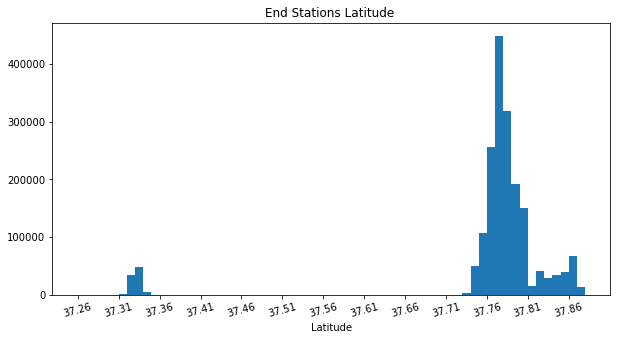

In [74]:
# Second Graph : End Stations

max_props = biketrips['start_station_latitude'].max()
min_props = biketrips['start_station_latitude'].min()

binsize = 0.01
#establish tick locations and create plot
fig1b = plt.figure(figsize = (10,5))

tick_props = np.arange(min_props,max_props + binsize, binsize * 5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
bins = np.arange(min_props,max_props + binsize, binsize)
plt.hist(biketrips['end_station_latitude'], bins = bins)

plt.xticks(tick_props , tick_names)
plt.xlabel('Latitude')
plt.xticks (rotation = 15)
plt.title('End Stations Latitude ')

Bigger, northern distribution : Unsurprisingly, these distrubution are the more or less identical. The distributions are binomial (with some imagination) with a very large peak around 37.77 degrees and a much smaller one around 37.86 degrees.

Now I will have a look at the longitudes

In [75]:
biketrips['start_station_longitude'].value_counts()

-122.394203    38461
-122.395526    37617
-122.395282    35092
-122.417385    34918
-122.393170    33716
               ...  
-122.239305       20
-122.392896       17
-122.225400       14
-122.392706       11
-121.890856        6
Name: start_station_longitude, Length: 351, dtype: int64

In [76]:
biketrips['start_station_longitude'].describe()

count    1.851950e+06
mean    -1.223521e+02
std      1.186128e-01
min     -1.224737e+02
25%     -1.224116e+02
50%     -1.223974e+02
75%     -1.222894e+02
max     -1.218333e+02
Name: start_station_longitude, dtype: float64

Text(0.5, 1.0, 'Start Stations Longitude ')

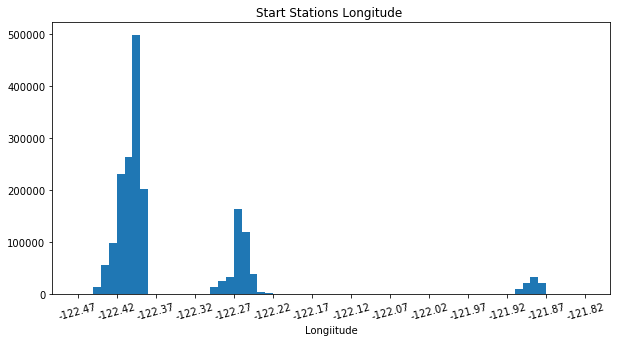

In [77]:
# Third Graph : Longitude start stations

max_props = biketrips['start_station_longitude'].max()
min_props = biketrips['start_station_longitude'].min()

binsize = 0.01
#establish tick locations and create plot
fig1b = plt.figure(figsize = (10,5))

tick_props = np.arange(min_props,max_props + binsize, binsize * 5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
bins = np.arange(min_props,max_props + binsize, binsize)
plt.hist(biketrips['start_station_longitude'], bins = bins)

plt.xticks(tick_props , tick_names)
plt.xlabel('Longiitude')
plt.xticks (rotation = 15)
plt.title('Start Stations Longitude ')



Text(0.5, 1.0, 'End Stations Longitude ')

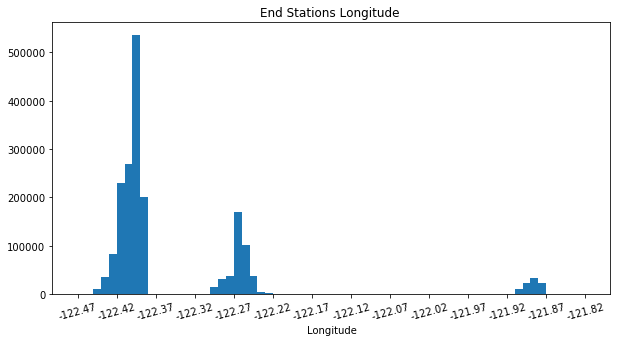

In [78]:
# Fourth Graph :Longitude end stations

max_props = biketrips['end_station_longitude'].max()
min_props = biketrips['end_station_longitude'].min()

binsize = 0.01
#establish tick locations and create plot
fig1b = plt.figure(figsize = (10,5))

tick_props = np.arange(min_props,max_props + binsize, binsize * 5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
bins = np.arange(min_props,max_props + binsize, binsize)
plt.hist(biketrips['end_station_longitude'], bins = bins)

plt.xticks(tick_props , tick_names)
plt.xlabel('Longitude')
plt.xticks (rotation = 15)
plt.title('End Stations Longitude ')

It could be innteresting to explore the other features per area. I will add an extra column which contains a code that indicates the start area and a second column that indicates the end area.

#### - Defining the Start Area

First I will start with the nort and south area

In [79]:
## Fill the column nort_south with the value according to the latitude
criteria = [biketrips['start_station_latitude'].between(37.26, 37.56),
            biketrips['start_station_latitude'].between(37.57, 37.90)]
values = ['S','N']

biketrips['north_south'] = np.select(criteria, values, 0)

In [80]:
biketrips['north_south'].value_counts()

N    1764464
S      87486
Name: north_south, dtype: int64

In [81]:
## Fill the column east_west with the value according to the longitude
criteria = [biketrips['start_station_longitude'].between(-122.50, -122.35),
            biketrips['start_station_longitude'].between(-122.34, -121.80)]
values = ['W','E']

biketrips['east_west'] = np.select(criteria, values, 0)

In [82]:
biketrips['east_west'].value_counts()

W    1362601
E     489349
Name: east_west, dtype: int64

In [83]:
## Finally, I create a colummn aera which combines the nort_south and east_west_column
biketrips['start_area'] = biketrips['north_south'] + biketrips['east_west']

In [84]:
biketrips['start_area'].value_counts()

NW    1362601
NE     401863
SE      87486
Name: start_area, dtype: int64

More to the east, there is a second and even a third, much smaller cluster. Between the three cluters there are no bike rental stations.
Bigger, western distribution : Absolute maximum of end stations around -122.40

#### - Defining the End Area

Again, I will start with the north and south area

In [85]:
## Fill the column nort_south with the value according to the latitude
criteria = [biketrips['end_station_latitude'].between(37.26, 37.56),
            biketrips['end_station_latitude'].between(37.57, 37.90)]
values = ['S','N']

biketrips['north_south_end'] = np.select(criteria, values, 0)

In [86]:
biketrips['north_south_end'].value_counts()

N    1764463
S      87487
Name: north_south_end, dtype: int64

In [87]:
## Fill the column east_west with the value according to the longitude
criteria = [biketrips['end_station_longitude'].between(-122.50, -122.35),
            biketrips['end_station_longitude'].between(-122.34, -121.80)]
values = ['W','E']

biketrips['east_west_end'] = np.select(criteria, values, 0)

In [88]:
biketrips['east_west_end'].value_counts()

W    1362641
E     489309
Name: east_west_end, dtype: int64

In [89]:
## Finally, I create a colummn end_aera which combines the nort_south and east_west_column
biketrips['end_area'] = biketrips['north_south_end'] + biketrips['east_west_end']

In [90]:
## Calculation of the inter-area trips
int_biketrips = biketrips[biketrips['start_area']!= biketrips['end_area']]

In [91]:
int_biketrips.shape[0]

96

In [92]:
int_biketrips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,months,weeknr,hour,distance,north_south,east_west,start_area,north_south_end,east_west_end,end_area
33277,5502,2018-02-19 14:57:39.499,2018-02-19 16:29:22.328,148.0,Horton St at 40th St,37.829705,-122.287610,28.0,The Embarcadero at Bryant St,37.787168,...,Feb,8,14,10.015212,N,E,NE,N,W,NW
33279,5499,2018-02-19 14:57:39.675,2018-02-19 16:29:19.406,148.0,Horton St at 40th St,37.829705,-122.287610,28.0,The Embarcadero at Bryant St,37.787168,...,Feb,8,14,10.015212,N,E,NE,N,W,NW
43330,5008,2018-02-15 19:49:36.539,2018-02-15 21:13:04.951,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,219.0,Marston Campbell Park,37.809824,...,Feb,7,19,10.693862,N,W,NW,N,E,NE
87711,3194,2018-02-05 23:25:31.577,2018-02-06 00:18:46.446,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,243.0,Bancroft Way at College Ave,37.869360,...,Feb,6,23,14.803843,N,W,NW,N,E,NE
90964,2031,2018-02-05 09:09:45.487,2018-02-05 09:43:36.922,191.0,Market St at 40th St,37.830545,-122.273937,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,Feb,6,9,12.038780,N,E,NE,N,W,NW


In [93]:
## in the following table we are interested in the distance column
int_biketrips.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,weekday,month,weeknr,hour,distance
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,10585.687500,152.552083,37.809465,-122.314409,89.166667,37.792886,-122.360783,2160.593750,2.635417,6.333333,25.541667,13.572917,12.519319
std,15679.340966,93.115081,0.023131,0.059634,92.106193,0.051342,0.075000,1331.707717,1.892477,3.294866,14.315186,4.347400,5.763402
min,965.000000,5.000000,37.764710,-122.431158,3.000000,37.352601,-122.436861,79.000000,0.000000,1.000000,2.000000,1.000000,8.799916
25%,2220.500000,59.500000,37.795393,-122.394203,15.000000,37.786970,-122.403234,1141.500000,1.000000,3.750000,13.750000,10.000000,10.489120
50%,3825.000000,169.500000,37.806279,-122.287610,24.000000,37.792251,-122.394643,2058.500000,2.500000,6.500000,26.500000,13.000000,11.621587
75%,13798.000000,230.000000,37.827920,-122.271738,176.000000,37.800754,-122.289194,3156.250000,4.000000,9.000000,36.000000,17.000000,13.100878
max,76514.000000,363.000000,37.869060,-122.249680,323.000000,37.880222,-121.905733,5394.000000,6.000000,12.000000,52.000000,23.000000,65.309254


In [94]:
## We can now remove again the columns north_south, east_west, nort_south_end, east_west_end
biketrips.drop(['north_south','east_west','north_south_end','east_west_end'], axis=1, inplace=True)

In [95]:
biketrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 131168
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
weekday                    int64
month                      int64
months                     object
weeknr                     int64
hour                       int64
distance                   float64
start_area                 object
end_area                   object
dtypes: datetime64[ns](2), float64(7), int64(6), object(7)
memory usage: 365.0+ MB


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Duration in seconds : Here I looked only at the trips with a duration of max 30 minutes. They represent 95% of the total trips. In this group of trips I could see that the most frequent duration was between 5 and 7 minutes. For less than 5 min, the frequency goes steeply down to zero. For the trips that take more than 5 to 7 minutes. The slope goes down almost like in a normal distribution to 30 minutes.

> Month : Surprisingly, October was the busiest month for biketrips in this aerea and not the summer months. This high frequency of bike rentals was spread equally over this month and didn't seem to be linked to a particular event.

> Hour:  I could see twee peaks for bike rentals : One around 8 am and one around 5 pm. The lowest activity is 3 am -4 am in the morning. The bike rentals seem to be linked with the start and end of the business hours.

> Day : The midweek days (Tuesday till Thursday) have they highest rental frequency, followed by the start and end of the business week. The weekends have the lowest frequency and Sunday has less rental than Saturday. This seems to confirm that mostly people who need to reach their workpalce rent the bikes.

> Distance : About 75% drives less than 2 km. The most popular distance are 1 km and 1.5 km. This is probably in most cases the distance between the railway station, parking lot and the workplace. Also a considerable amount of users who bring back the bike at the station they started.

> The trips between two area are almost inexistant (96 only)


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to do very little operations on the data. I removed some rows with no values for the start and end station id and name. (This operation deleted at the same time rows with outliers for the longitudes and latitudes of the start and end stations).  I added four columns month, weekday, hour and weeknr, based on the value in the start_time column.The existence of these columns make the programming much easier and better to understand. I added a column to calculated the distance (great circle distance) between the start station and  the end station. I noticed there where three clusters of stations, so I added two colums start_area and end_area to better distinguish between the inter-cluster and intra- cluster trips. 


## 3) Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data set


#### 3a ) Bivariate Exploration - Relationship between Durantion and Distance

(Once again, with distance is meant the distance between start station and end station)

Text(0.5, 1.0, 'Duration Bike trip and Distance')

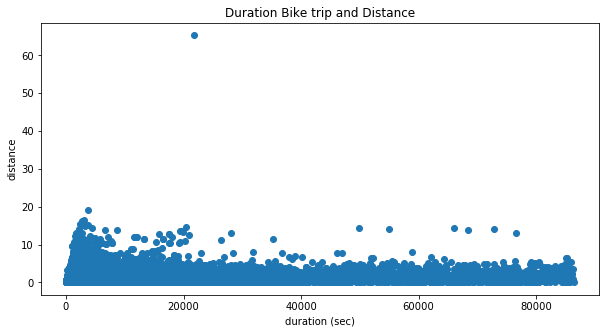

In [96]:
#plt.scatter(data = biketrips, x = 'distance', y = 'duration_sec')
plt.figure(figsize = [10,5])
plt.scatter(data = biketrips, x = 'duration_sec', y = 'distance')
plt.xlabel('duration (sec)')
plt.ylabel('distance')
plt.title('Duration Bike trip and Distance')

Not a lot to see here, there are to many points in the dataset

In [97]:
## There are to many datapoints.Let's take a random selection from the dataset
bike_sample = biketrips.sample(n = 1000)
bike_sample.shape[0]

1000

Text(0.5, 1.0, 'Duration Bike trip and Distance')

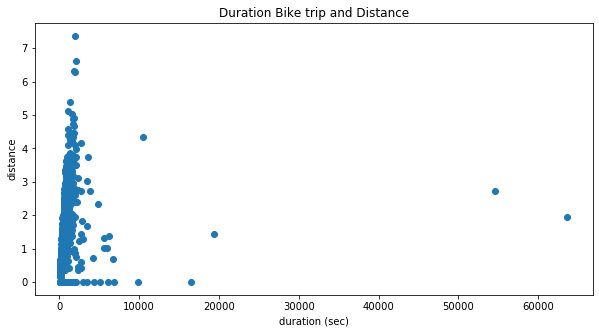

In [98]:
#plt.scatter(data = biketrips, x = 'distance', y = 'duration_sec')
plt.figure(figsize = [10,5])
plt.scatter(data = bike_sample, x = 'duration_sec', y = 'distance')
plt.xlabel('duration (sec)')
plt.ylabel('distance')
plt.title('Duration Bike trip and Distance')

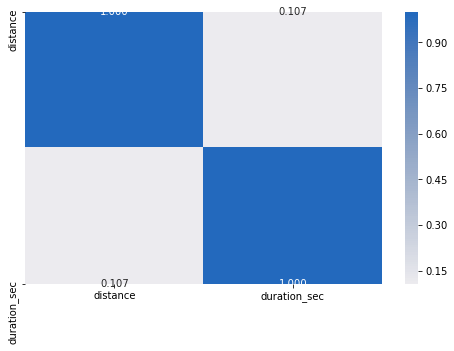

In [99]:
numeric_vars = ['distance', 'duration_sec']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_sample[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

As we can see from both graphs, there is only a very week positive correclation between the duration of a biketrip and the time of the rental.I would like to test the same correlation in the group of rentals with a duration of 30 min.

In [100]:
## Only rows with a timeframe up to 30 minutes
bike_30 = biketrips[biketrips['duration_sec'] <= 1800]
bike_30.shape[0]

1758815

In [101]:
##again we take a sample
bike_30_sample = bike_30.sample(n = 1000)

In [102]:
bike_30_sample.shape[0]

1000

Text(0.5, 1.0, 'Duration Bike trip and Distance')

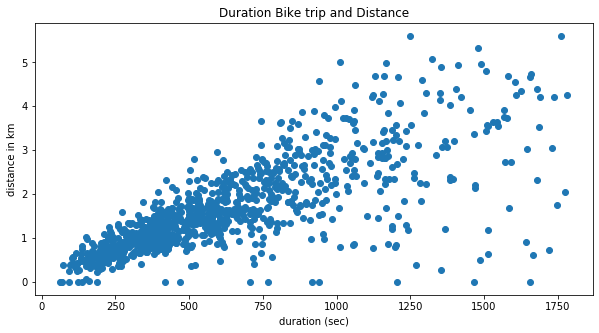

In [103]:
#plt.scatter(data = biketrips, x = 'distance', y = 'duration_sec')
plt.figure(figsize = [10,5])
plt.scatter(data = bike_30_sample, x = 'duration_sec', y = 'distance')
plt.xlabel('duration (sec)')
plt.ylabel('distance in km')
plt.title('Duration Bike trip and Distance')

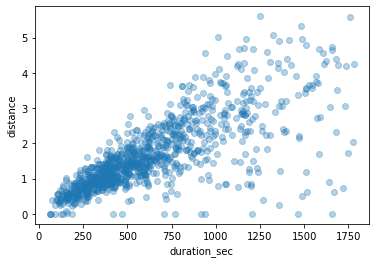

In [104]:
## I would like to add some transparency

sb.regplot(data = bike_30_sample, x = 'duration_sec', y = 'distance', x_jitter = 0.06,
           fit_reg = False,scatter_kws = {'alpha' : 1/3})

> The concentration of the points is at the shorter durations (shorter than 500 sec) and distances short than 2 km.

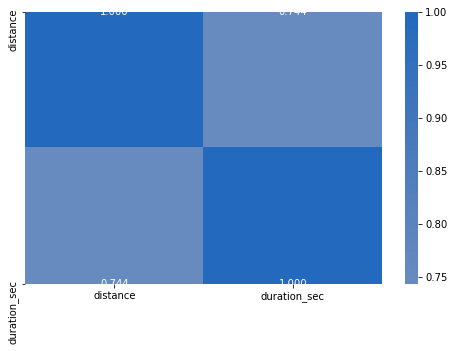

In [105]:
numeric_vars = ['distance', 'duration_sec']
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_30_sample[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> For this subset, the correlation is much stronger. The longer the distance between start point and end point, the longer the trip takes. This is probly the group of users that rent a bike
to go from point a to b, without making a roundtrip. The vast majority of the Baywheels users of are users that go from point a to b.

#### 3b) Bivariate Exploration - Relation between weekday and hour

In the univarite exploration I showed a rental pattern for the weekday and the hour separately. Can we say the same if we combine both ?
The weekday and hour are two discrete variables, the best option is therefore a heatmap.

Text(0.5, 1.0, 'Rental Overview per Day and Hour')

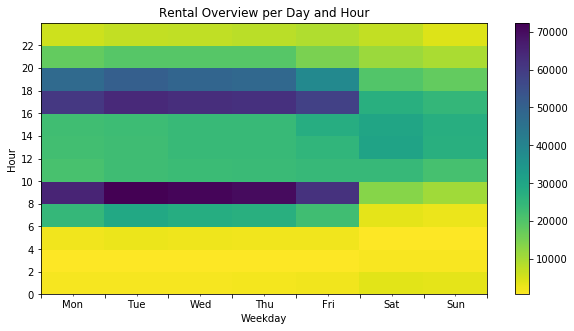

In [106]:
## creation of the heatmap

bins_x = np.arange(0, 7+1, 1)
bins_y = np.arange(0, 24+1, 2)
fig = plt.figure(figsize = [10, 5]) # larger figure size for subplots

ax1 = fig.add_subplot(1,1,1)

ax1.xaxis.set_major_formatter(ticker.NullFormatter())


# Customize minor tick labels
ax1.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
ax1.xaxis.set_minor_formatter(ticker.FixedFormatter(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))






plt.yticks(np.arange(0,24,2))
plt.hist2d(data = biketrips, x = 'weekday', y = 'hour',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 100)
plt.colorbar()
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.title('Rental Overview per Day and Hour')

The hour pattern is defintely not the same on working days and weekend days. During the weekends the start of the rental is most likely between 12 am and 4 pm. On working days the are two top moments : One between 8-10 am  and another one between 4 - 6 pm. 

Text(0.5, 1.0, 'Rental Overview per Day and Hour')

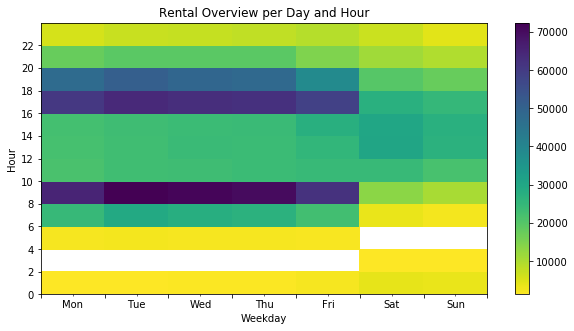

In [107]:
## creation of the heatmap (show only > 1000)

bins_x = np.arange(0, 7+1, 1)
bins_y = np.arange(0, 24+1, 2)
fig1 = plt.figure(figsize = [10, 5])

ax1 = fig1.add_subplot(1,1,1)


ax1.xaxis.set_major_formatter(ticker.NullFormatter())


# Customize minor tick labels
ax1.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
ax1.xaxis.set_minor_formatter(ticker.FixedFormatter(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))






plt.yticks(np.arange(0,24,2))
plt.hist2d(data = biketrips, x = 'weekday', y = 'hour',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 1000)
plt.colorbar()
plt.xlabel('Weekday')
plt.ylabel('Hour')
plt.title('Rental Overview per Day and Hour')

When I show only the values (rentals per hour) greater than 1000, we can see that during weekdays, there are (nearly) no rentals between 2 and 4 pm , while in the weekends there is still some activity at that moment. The "no rentals" moment in the weekend is between 4pm and 6 pm, while on working days the early birds use the bikes already to get to their working place.

#### 3c) Bivariate Exploration - Relation between the type of customer and the weekday

This a basic presentation on the distribution of both user types. We see clear that the subscribers have a wider distribution on working days (Mon- Friday), while the non-subscribers have a wider distributiion during weekends, especially on Saturdays

Text(0.5, 1.0, 'Subscribers and Non-Subscribers (customers) per Day')

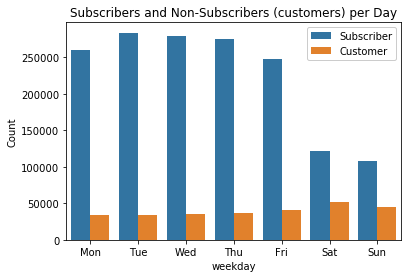

In [108]:
## The same presentation but with a clustered bar chart
ax = sb.countplot(data = biketrips, x = 'weekday', hue = 'user_type')
ax.legend(loc = 1, ncol = 1, framealpha = 1)
ax.set(ylabel="Count")
ax = plt.gca() 
tick_propsx = ax.get_xticks().tolist()
tick_namesx = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(tick_propsx, tick_namesx);
plt.title('Subscribers and Non-Subscribers (customers) per Day')


During the weekends , there a lot more non-subscribers. A better view would be to have proportions instead of counts

In [109]:
## preparation for the clustered bar-chart with percentages 
## calculation of the percentages

user_count = biketrips.groupby(['user_type'])['weeknr'].count()
print(user_count)
## total number of subscriber
total_subscriber = user_count['Subscriber']
## total number of non-subscribers
total_customer = user_count['Customer']
count_day = biketrips.groupby(['user_type','weekday'])['weeknr'].count()
count_day_subs = count_day['Subscriber']
count_day_custs = count_day['Customer']
prop_subs = count_day_subs/total_subscriber
prop_custs = count_day_custs/total_customer





user_type
Customer       276959
Subscriber    1574991
Name: weeknr, dtype: int64


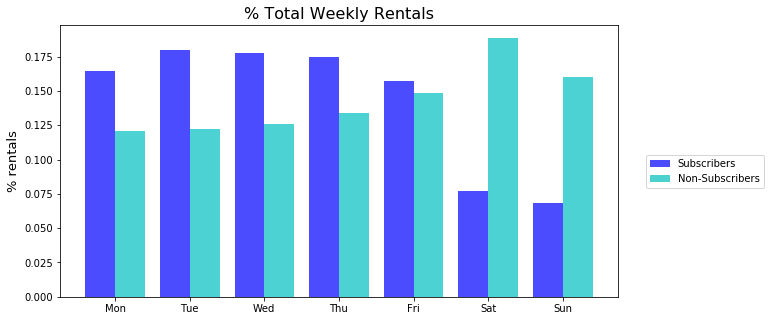

In [110]:

## plotting of the data
#Caluculate the number of elements on the x-as
fig3 = plt.figure(figsize = [10, 5])
x =np.arange(len(prop_subs))
width = 0.40

plt.bar(x, prop_subs, width, color='b', alpha=.7, label='Subscribers')
plt.bar(x + width, prop_custs, width, color='c', alpha=.7, label='Non-Subscribers')

locations = x + width / 2
tick_names = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# title and labels
plt.xticks(locations, tick_names)
plt.ylabel('% rentals', fontsize = 13)

plt.title('% Total Weekly Rentals', fontsize = 16)
plt.legend(loc=(1.05,0.4))



>The activity for the non-subscribers is relatively more important during te weekends. The rental activity is at its lowest level on monday and then goes up to Saturday. There is a big drop after the weekend.

#### 3d) Bivariate Exploration - Relation between Month and Starting Hour

I had already a look at the starting hour per weekday, but what about the distribution of the starting date over the months ? Do people start using the bikes later in wintertim than in summertime ? Or is the opposite ?

I will start with a heatmap

Text(0.5, 1.0, 'Monthly Rental Overview per Hour')

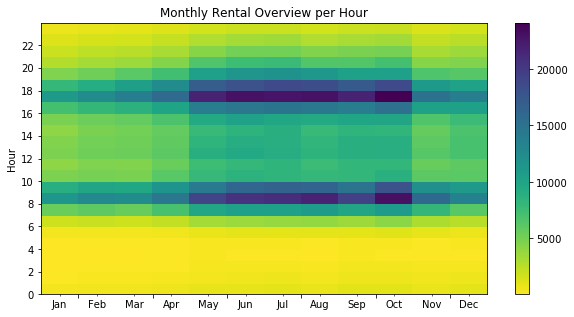

In [111]:
## creation of the heatmap (show only > 1000)
binsize = 1

bins_x = np.arange(1, 13+ binsize, binsize)

                                                   
bins_y = np.arange(0, 24+1, 1)
fig4 = plt.figure(figsize = [10, 5])
ax4 = fig4.add_subplot(1,1,1)
ax4.xaxis.set_major_formatter(ticker.NullFormatter())


#Customize minor tick labels - put the ticks in the middle
ax4.xaxis.set_minor_locator(ticker.FixedLocator([1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,
                                                 9.5,10.5,11.5,12.5]))
ax4.xaxis.set_minor_formatter(ticker.FixedFormatter(['Jan','Feb','Mar','Apr','May','Jun','Jul'
                                                     ,'Aug','Sep','Oct','Nov','Dec']))
                                                     






plt.yticks(np.arange(0,24,2))
plt.hist2d(data = biketrips, x = 'month', y = 'hour',
           bins = [bins_x, bins_y], cmap = 'viridis_r')
plt.colorbar()

plt.ylabel('Hour')
plt.title('Monthly Rental Overview per Hour')

The darkest color is each time a horizontal line over the whole width of the graph. The users start their trips and he same time , regardless of the month.

Text(0.5, 0.98, '(Start) Hour Distribution per Month')

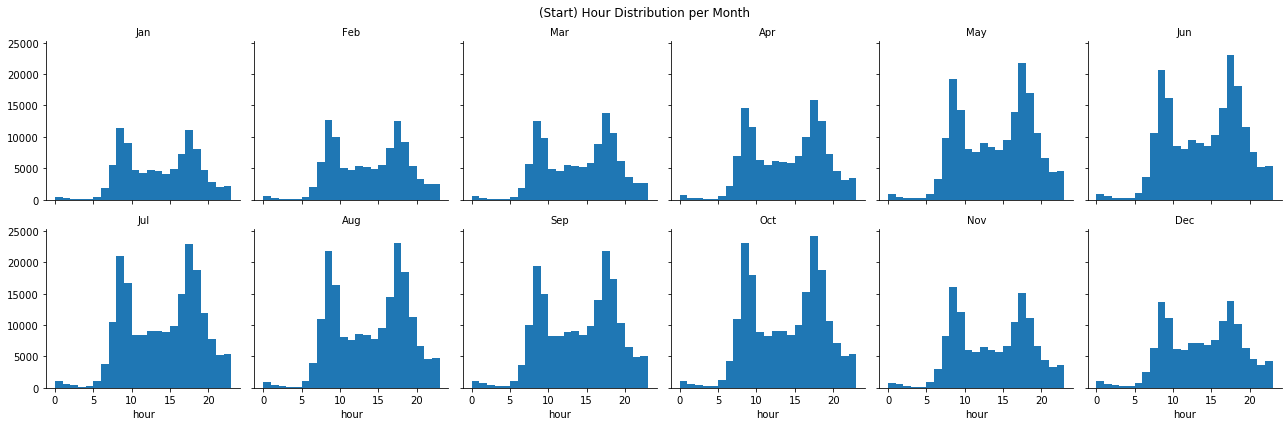

In [112]:
## The same relation with faceting

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
bin_edges = np.arange(0, biketrips['hour'].max()+1, 1)
g = sb.FacetGrid(data = biketrips, col = 'months',col_wrap = 6,col_order = month_order)
g.map(plt.hist, 'hour',bins = bin_edges)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('(Start) Hour Distribution per Month')






The shape of the distributions for the hours is practically the same in every month. As we saw already on the heatmap above, the 'start' behaviour of the bike users is not different per month.

#### 3e) Bivariate Exploration - Relation between Bike share and User type

As I don't understand this variable very well, I would like to see whether it is related to the user type

In [113]:
## The purpose is to show a clustered bar chart with percentages instead of count
## calculation of the percentages
## The values for the user type will be on the x-as with a clustered bar chart for the bike sharing

##calculation of the denominator
count2 = biketrips.groupby(['bike_share_for_all_trip'])['weeknr'].count()
print(count2)
## calculation of the numerators
count1 = biketrips.groupby(['user_type','bike_share_for_all_trip'])['weeknr'].count()
prop1 = count1['Customer']/count2
prop2 = count1['Subscriber']/count2


bike_share_for_all_trip
No     1690457
Yes     161493
Name: weeknr, dtype: int64


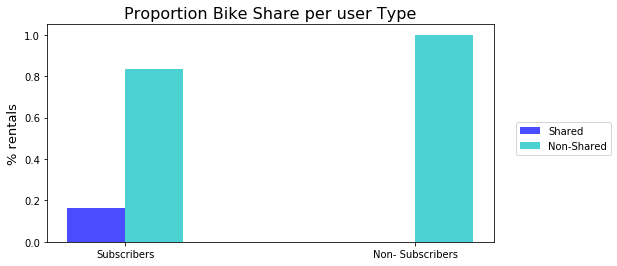

In [114]:
## plotting of the data
#Caluculate the number of elements on the x-as
fig3 = plt.figure(figsize = [8, 4])
x =np.arange(len(prop1))
width = 0.20

plt.bar(x, prop1, width, color='b', alpha=.7, label='Shared')
plt.bar(x + width, prop2, width, color='c', alpha=.7, label='Non-Shared')

locations = x + width / 2
tick_names = ['Subscribers', 'Non- Subscribers']

# title and labels
plt.xticks(locations, tick_names)
plt.ylabel('% rentals', fontsize = 13)

plt.title('Proportion Bike Share per user Type', fontsize = 16)
plt.legend(loc=(1.05,0.4))


Only the Subscribers use the option "Bike share" (for about 18%), the non-subscibers don't use this ooption at all.

#### 3f) Bivariate Exploration - Relation between Bike share and Month

Is there a kind of change in the bike sharing over the months ?

In [115]:
## The purpose is to show a clustered bar chart with percentages instead of count
## calculation of the percentages
## The values for the mont will be on the x-as with a clustered bar chart for the bike sharing

##calculation of the denominator
count4 = biketrips.groupby(['month'])['weeknr'].count()

## calculation of the numerators
count3 = biketrips.groupby(['bike_share_for_all_trip','month',])['weeknr'].count()

prop3 = count3['Yes']/count4
prop4 = count3['No']/count4




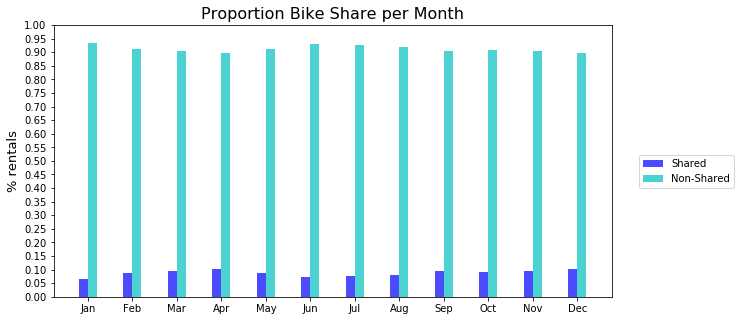

In [116]:
### plotting of percentages
#Caluculate the number of elements on the x-as
fig3 = plt.figure(figsize = [10, 5])
x =np.arange(len(prop3))
width = 0.20

plt.bar(x, prop3, width, color='b', alpha=.7, label='Shared')
plt.bar(x + width, prop4, width, color='c', alpha=.7, label='Non-Shared')

# title and labels
locations = x + width / 2
tick_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


plt.xticks(locations, tick_names)
plt.yticks(np.arange(0,1.05,0.05))
plt.ylabel('% rentals', fontsize = 13)

plt.title('Proportion Bike Share per Month', fontsize = 16)
plt.legend(loc=(1.05,0.4))


The % of the bike share is all the year between 5% anf 10% with the highest values in March and  April



> In this second part, I started by looking at a possible correlation between duration and distance. On the total of the dataset, there was no correlation. Only by taking a random sample and limiting the duration to 30 min, the correlation  between the duration and the distance between start and end station became visible.
> I looked also at the relation between weekday the start hour of the trip. Here I could see a difference between the business days and the weekend days. On business days, I could see that there are two peaks, one between 8-10 am and one between 5 am - 6 am. On weekend days the peak is in the early afternoon.
Next, I looked at the variables user type and day. The user type 'Subscribers' are relatively spoken, more active on business days. The user type 'Customers' are relatively more active on weekend days.
Last, I wanted to verify whether the month had an impact on the starting hours. I couldn't detect a significant difference in the starting hour distribution per month. Only the subscribers use the option 'bike share' (18%). The non-subscribers don't use this option at all.



## 4) Multivariate Exploration

In this section. I will expand some of the plots, made in the bivariate exploration with an extra variable

#### 4a ) Multivariate Exploration - Relationship between Durantion and Distance per User Type 


In [117]:
## I take again a sample of the dataframe
bike_30 = biketrips[biketrips['duration_sec'] <= 1800]
bike_sample_30 = bike_30.sample(n = 1000,random_state=1)
bike_sample_30.shape[0]

1000

In [118]:
bike_sample.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,weekday,month,months,weeknr,hour,distance,start_area,end_area
144393,290,2018-10-09 15:39:51.016,2018-10-09 15:44:41.682,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,47.0,4th St at Harrison St,37.780955,...,Subscriber,No,1,10,Oct,41,15,0.754027,NW,NW
160707,388,2018-08-06 11:53:39.700,2018-08-06 12:00:08.542,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,...,Subscriber,No,0,8,Aug,32,11,1.218016,NW,NW
102215,242,2018-10-16 08:26:33.455,2018-10-16 08:30:35.986,178.0,Broadway at 30th St,37.819381,-122.261928,182.0,19th Street BART Station,37.809013,...,Subscriber,No,1,10,Oct,42,8,1.279619,NE,NE
117712,756,2018-08-13 08:05:40.275,2018-08-13 08:18:17.083,22.0,Howard St at Beale St,37.789756,-122.394643,6.0,The Embarcadero at Sansome St,37.804770,...,Subscriber,Yes,0,8,Aug,33,8,1.832199,NW,NW
67479,444,2018-07-21 15:06:28.183,2018-07-21 15:13:53.146,91.0,Berry St at King St,37.771762,-122.398438,62.0,Victoria Manalo Draves Park,37.777791,...,Subscriber,No,5,7,Jul,29,15,0.971101,NW,NW


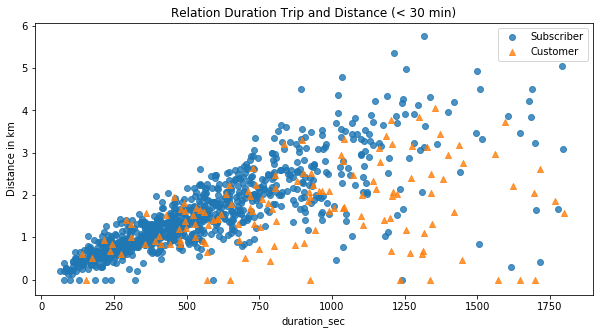

In [119]:
## plot the data
fig5 = plt.figure(figsize = [10, 5])
ttype_markers = [['Subscriber','o'],['Customer','^']]
for ttype, marker in ttype_markers:
    plot_data = bike_sample_30[bike_sample_30['user_type']== ttype]
    sb.regplot(data= plot_data, x = 'duration_sec', y = 'distance', x_jitter = 0.04,
               fit_reg= False,marker = marker);
  
    
plt.ylabel('Distance in km')   
plt.legend(['Subscriber','Customer'])    
plt.title('Relation Duration Trip and Distance (< 30 min)');

For the time frames shorter than 30 min, there is clearly a positive relation between the duration of the rental and the distance between start and end station. This relation is stronger for the subscribers than for the customers and stronger when the time frame is shorter 

I would like to do the same for the time frame 31 min to 60 min

In [120]:
## I take again a sample of the dataframe between 90 min and 2 hours
bike_60 = biketrips[(biketrips['duration_sec'] >1800 )& (biketrips['duration_sec'] <= 3600)]
bike_sample_60 = bike_60.sample(n = 1000,random_state=1)
bike_sample_60.shape[0]

1000

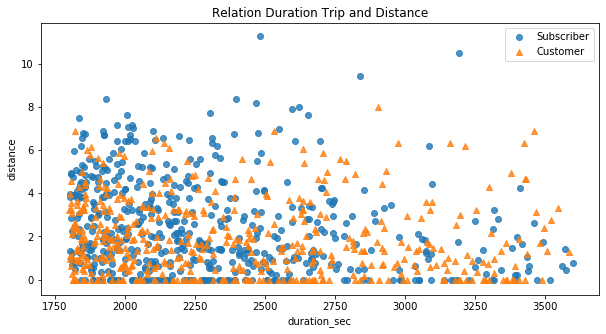

In [121]:
## plot the data
fig6 = plt.figure(figsize = [10, 5])
ttype_markers = [['Subscriber','o'],['Customer','^']]
for ttype, marker in ttype_markers:
    plot_data = bike_sample_60[bike_sample_60['user_type']== ttype]
    sb.regplot(data= plot_data, x = 'duration_sec', y = 'distance', x_jitter = 0.04,
               fit_reg= False,marker = marker);
  
    
    
plt.legend(['Subscriber','Customer'])    
plt.title('Relation Duration Trip and Distance');


In the second half hours, we see all possible distances, as well for subscribers as for customers.The volatility for subscribers is here even bigger than for customers. 

The following two graphs show the same but with faceting over customer type

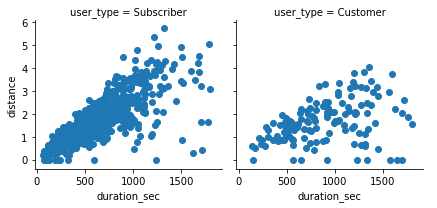

In [122]:
##bivariate faceting for the shorter time frames
g = sb.FacetGrid(data = bike_sample_30, col = 'user_type')
g.map(plt.scatter, 'duration_sec','distance')
g.add_legend()




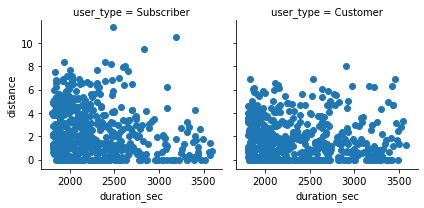

In [123]:
##bivariate faceting for the  longer time frames
g = sb.FacetGrid(data = bike_sample_60, col = 'user_type')
g.map(plt.scatter, 'duration_sec','distance')

#### 4b ) Multivariate Exploration - Relationship between Month and Hour per User Type 

In [124]:
## Take a random sample of the dataframe (the same datafram as uase above)
bike_30_1000 = bike_30.sample(n = 1000,random_state=1)
#np.random.seed(2018)
#sample = np.random.choice(bike_30.shape[0],1000,replace = False)
#bike_30_300 = bike_30.loc[sample]

In [125]:
bike_30_1000.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,weekday,month,months,weeknr,hour,distance,start_area,end_area
15639,900,2018-07-29 16:44:02.195,2018-07-29 16:59:03.087,259.0,Addison St at Fourth St,37.866249,-122.299371,157.0,65th St at Hollis St,37.846784,...,Subscriber,No,6,7,Jul,30,16,2.275350,NE,NE
10867,850,2018-06-29 08:11:16.281,2018-06-29 08:25:26.426,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,9.0,Broadway at Battery St,37.798572,...,Subscriber,No,4,6,Jun,26,8,2.492247,NW,NW
163244,1318,2018-07-07 14:05:27.835,2018-07-07 14:27:26.232,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,323.0,Broadway at Kearny,37.798014,...,Customer,No,5,7,Jul,27,14,1.103650,NW,NW
89817,851,2018-09-17 09:47:59.882,2018-09-17 10:02:11.525,60.0,8th St at Ringold St,37.774520,-122.409449,24.0,Spear St at Folsom St,37.789677,...,Subscriber,No,0,9,Sep,38,9,2.373710,NW,NW
40050,775,2018-07-25 17:18:47.491,2018-07-25 17:31:42.930,92.0,Mission Bay Kids Park,37.772301,-122.393028,100.0,Bryant St at 15th St,37.767100,...,Subscriber,No,2,7,Jul,30,17,1.654365,NW,NW


In [126]:
bike_30_1000.shape[0]

1000

<Figure size 720x360 with 0 Axes>

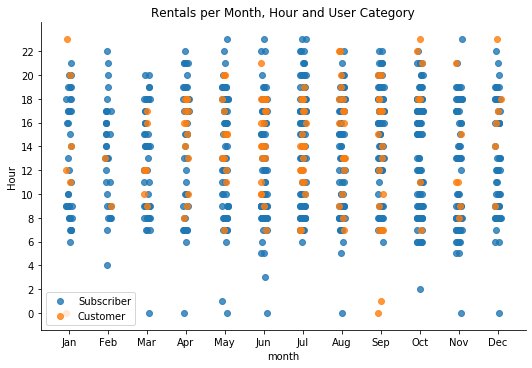

In [127]:
fig7 = plt.figure(figsize = [10, 5])

g = sb.FacetGrid(data=bike_30_1000, hue = 'user_type', hue_order = ['Subscriber','Customer'],
                height = 5, aspect = 1.5);
g.map(sb.regplot,'month', 'hour', x_jitter = 0.08,fit_reg = False);


tick_propsx = np.arange(1,13,1)

#labs = ax.get_xticklabels() ## not needed 
tick_namesx = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(tick_propsx, tick_namesx)

plt.title('Rentals per Month, Hour and User Category')
plt.yticks(np.arange(0,24,2))



plt.ylabel('Hour')
plt.legend(['Subscriber','Customer']); 



In the summer months, there concentration of non-subscribers (customers) is clearly higher than in winter; Non-subscribers start their trip more after lunch than before, although in the summer months they start riding also in the morning. Subscribers are more equally spread over the year with a lot of departures in the morning and in the late afternoon.

#### 4c ) Multivariate Exploration - Relationship betweenWeekday and Hour per User Type 

<Figure size 720x360 with 0 Axes>

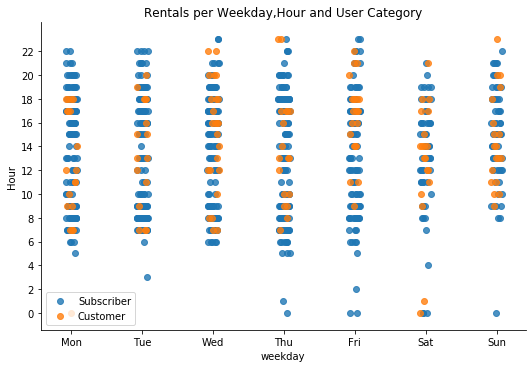

In [128]:
fig8 = plt.figure(figsize = [10, 5])

g = sb.FacetGrid(data=bike_30_1000, hue = 'user_type', hue_order = ['Subscriber','Customer'],
                height = 5, aspect = 1.5);
g.map(sb.regplot,'weekday', 'hour', x_jitter = 0.08,fit_reg = False);


tick_propsx = np.arange(0,7,1)

#labs = ax.get_xticklabels() ## not needed 
tick_namesx = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(tick_propsx, tick_namesx)

plt.title('Rentals per Weekday,Hour and User Category')
plt.yticks(np.arange(0,24,2))



plt.ylabel('Hour')
plt.legend(['Subscriber','Customer']); 


Once again, as in the view per month, much more non-subscribers (customers) who start their trip in the afternoon. Except on Saturday where it is the oposite. Sunday is moreor less equally spread Unsurprisingly less subscribers in the weekend. In general they start to ride earlier.



 



> Adding an extra variable to the analysis helped me to get more precise insights. For example in the bivariate analysis, it was clear that the departure times in the weekends were later than on business days, but this is not true if you look at the behaviour of the subscribers and non-subscribers separately. Also surprising for me was that the idea that the subscribers are the people who use the bikes only to make the same short trip to their working place is not completely true. In the time frame from 30 min to  60 min, there are a lot of subscribers and they seem to make trips of all distances within that time frame.